# Введение. Базовые методы анализа данных.

# Библиотеки

In [3]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib import gridspec
import pandas as pd
import scipy.stats as st
import seaborn as sns

In [4]:
# параметр для задания толщины линии
plt.rcParams['lines.linewidth'] = 1
# параметр для задания ширины точек
plt.rcParams['lines.markersize'] = 6
# параметр для задания шрифта осей x и y (цифр на осях)
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
# параметр для задания шрифта на осях 
plt.rcParams['legend.fontsize'] = 24
# параметр для задания шрифта заголовка
plt.rcParams['axes.titlesize'] = 36
# параметр для задания шрифта осей x и y (название оси)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['figure.figsize'] = (8.0, 4.0)
# параметр для задания шрифта вспомагательных записей на графику (annotate или text)
plt.rcParams['font.size'] = 10

# Построение графиков

## Построение одного графика

In [5]:
def plot():
    plt.rcParams['lines.linewidth'] = 2
    plt.rcParams['lines.markersize'] = 6
    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18
    plt.rcParams['legend.fontsize'] = 18
    plt.rcParams['axes.titlesize'] = 36
    plt.rcParams['axes.labelsize'] = 18
    plt.rcParams['figure.figsize'] = (8.0, 4.0)
    plt.rcParams['font.size'] = 18
    ###########################################

    x = np.linspace(-2*np.pi, np.pi)
    y = np.sin(x)
    plt.plot(x, y, label='$y = sin(x)$')
    x = np.arange(-4, 2)
    y = x
    plt.plot(x, y, label='$y = x$')
    # отрисовка легенды графика
    plt.legend(loc='best')
    # подпись осей
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    # заголовок
    plt.title('Title')
    # отрисовка сетки на графике
    plt.grid()
    plt.show()

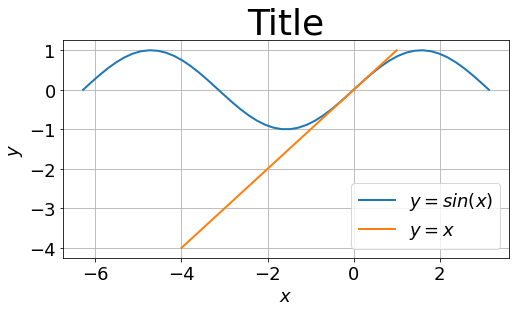

In [6]:
plot()

## Построение нескольких графиков

In [6]:
def plot():
    plt.rcParams['lines.linewidth'] = 2
    plt.rcParams['lines.markersize'] = 6
    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18
    plt.rcParams['legend.fontsize'] = 18
    plt.rcParams['axes.titlesize'] = 36
    plt.rcParams['axes.labelsize'] = 18
    plt.rcParams['figure.figsize'] = (16.0, 8.0)
    plt.rcParams['font.size'] = 50
    ###########################################

    fig = plt.figure()

    gs = gridspec.GridSpec(2, 2)

    subs = []
    for sub in gs:
        subs.append(fig.add_subplot(sub))
    subs = np.reshape(subs, [2,2])

    subplotNames = ['First', 'Second', 'Third', 'Forth']

    for i in range(4):
        subs[i//2][i%2].annotate(text=subplotNames[i], xy=(0,0))
        subs[i//2][i%2].set_xlim(-1,1)
        subs[i//2][i%2].set_ylim(-1,1)

    plt.show()

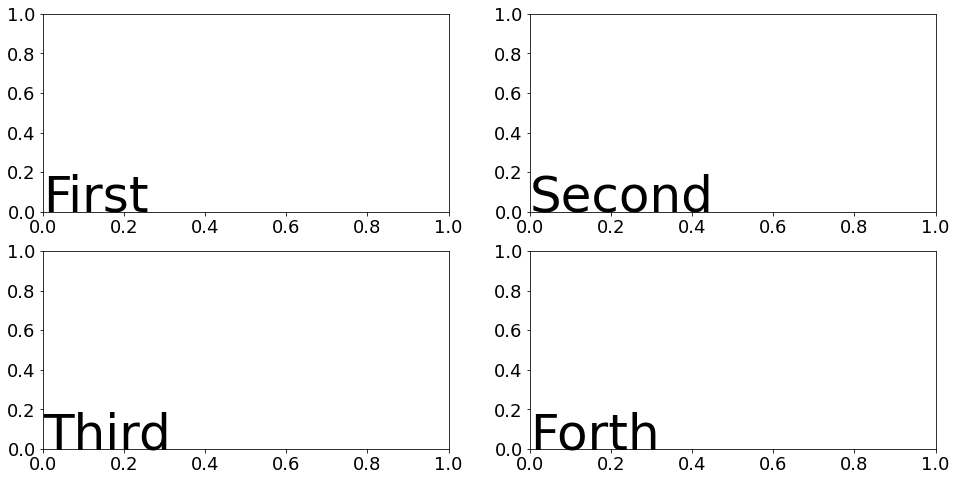

In [7]:
plot()

# Работа с ```pandas```

## Загрузка данных
Загрузим данные из csv-файла с помощью библиотеки pandas 

In [9]:
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [10]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Некоторые функции по работе с ```pandas```

### Сэмплируем данные из выборки

In [11]:
data.sample(n=4, random_state=40)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
358,5.20177,0.0,18.10,1,0.770,6.127,83.4,2.7227,24,666,20.2,395.43,11.48,22.7
197,0.04666,80.0,1.52,0,0.404,7.107,36.6,7.3090,2,329,12.6,354.31,8.61,30.3
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
450,6.71772,0.0,18.10,0,0.713,6.749,92.6,2.3236,24,666,20.2,0.32,17.44,13.4


### Выбираем интересующую нас колонку

In [12]:
data['indus'].head(n=2)

0    2.31
1    7.07
Name: indus, dtype: float64

### Выбираем несколько колонок

In [13]:
data.iloc[:, 1:3].head(n=2)

,zn,indus
0,18.0,2.31
1,0.0,7.07


### Выбираем интересующие нас строки

In [14]:
data.iloc[1:3]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


### Конвертируем данные из ```pandas``` в ```numpy``` массив

In [15]:
data2 = data.to_numpy()
data3 = data.values

In [16]:
(data3 - data2).sum()

0.0

# Визуализация

### Описание столбцов матрицы, описывающей выборку

In [17]:
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

```CRIM: Per capita crime rate by town
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: Nitric oxide concentration (parts per 10 million)
RM: Average number of rooms per dwelling
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to five Boston employment centers
RAD: Index of accessibility to radial highways
TAX: Full-value property tax rate per $10,000
PTRATIO: Pupil-teacher ratio by town
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
LSTAT: Percentage of lower status of the population
MEDV: Median value of owner-occupied homes in $1000s```

### Выберем столбец MEDV

In [18]:
x = data['medv'].values

## Гистограмма

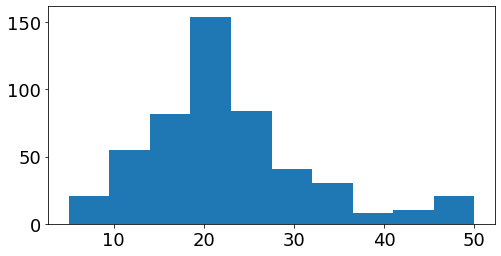

In [19]:
plt.rcParams['figure.figsize'] = (8.0, 4.0)
###########################################

plt.hist(x)
plt.show()

## Ядерная оценка

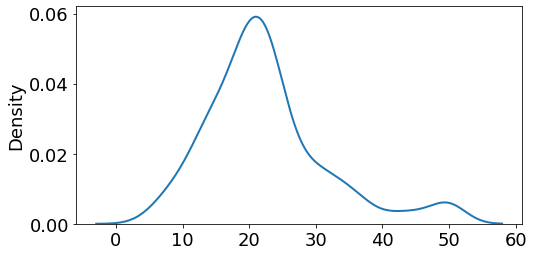

In [20]:
plt.rcParams['figure.figsize'] = (8.0, 4.0)
###########################################

sns.kdeplot(x)
plt.show()

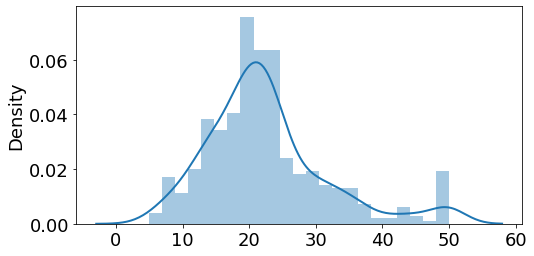

In [21]:
plt.rcParams['figure.figsize'] = (8.0, 4.0)
###########################################

sns.distplot(x)
plt.show()

## Корреляционная матрица
Отобразим корреляционную матрицу для всех признаков объекта

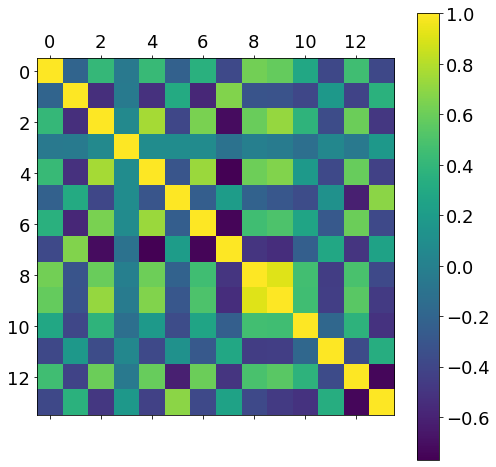

In [22]:
plt.rcParams['figure.figsize'] = (8.0, 8.0)
###########################################

matrix = np.corrcoef(data.values, rowvar=False)
im = plt.matshow(matrix)
plt.colorbar(im)
plt.show()

## Аналогичный график в seaborn + pandas

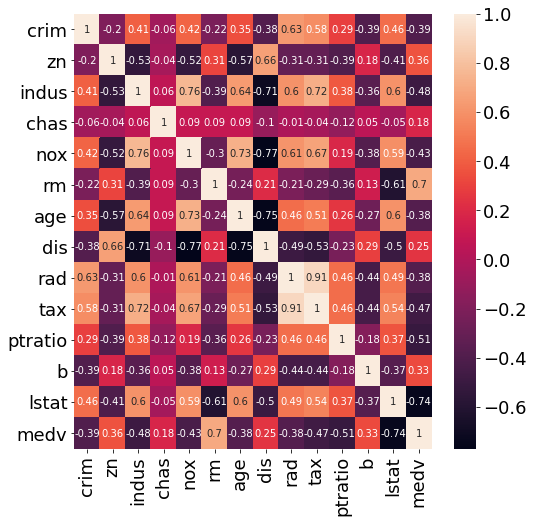

In [23]:
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.rcParams['font.size'] = 10
###########################################

cor = data.corr().round(2)
sns.heatmap(data=cor, annot=True)
plt.show()

## Попарные диаграммы рассеяния для первых трех признаков

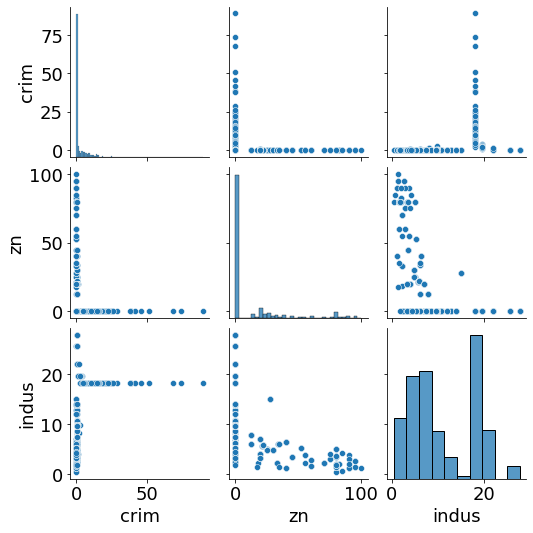

In [24]:
sns.pairplot(data.iloc[:,0:3])
plt.show()

## Аналогичный график в matplotlib

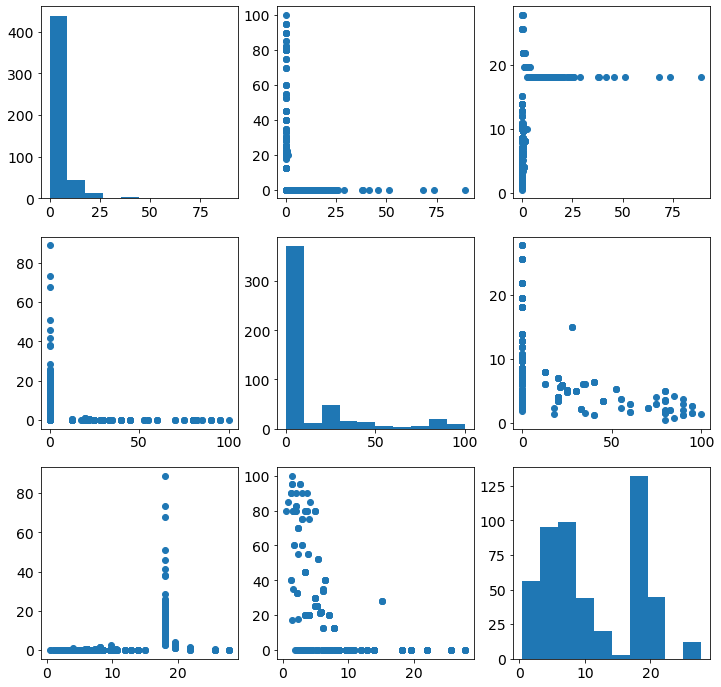

In [36]:
plt.rcParams['figure.figsize'] = (12.0, 12.0)
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
###########################################

def make_scatter(i, j, subplot):
    subplot.scatter(data.values[:, i], data.values[:, j])

def make_plot(i, j, subplot):
    if i == j:
        subplot.hist(data.values[:, i])
    else:
        make_scatter(i, j, subplot)
    
for i in range(3):
    for j in range(3):
        subplot = plt.subplot(3, 3, i*3 + j + 1) # нумерация с единицы
        make_plot(i, j, subplot)
        

# Выборочные оценки

## Среднее и дисперсия

In [37]:
print('mean={}'.format(np.mean(x)))
print('std={}, std={}'.format(np.std(x), np.std(x, ddof=1)))

mean=22.532806324110677
std=9.188011545278203, std=9.197104087379818


## Медиана и мода распределения

In [38]:
print('median={}'.format(np.median(x)))
print('mode={}'.format(st.mode(x)))

median=21.2
mode=ModeResult(mode=array([50.]), count=array([16]))


## Минимальное и максимальное значение в выборке

In [39]:
print('maximum={}; ({})'.format(np.max(x), np.argmax(x)))
print('minimum={}; ({})'.format(np.min(x), np.argmin(x)))

maximum=50.0; (161)
minimum=5.0; (398)


## Квантили распределения

In [40]:
alpha = 0.5
print('q(0.5)={}'.format(np.quantile(x, alpha)))

q(0.5)=21.2


## Интерквартильный размах

In [44]:
alpha1 = 0.75
alpha2 = 0.25
print('q(0.5)={}'.format(np.quantile(x, alpha1) - np.quantile(x, alpha2)))

q(0.5)=7.975000000000001


```Ожидаемый ответ: ~7.975```

## Ранг $x=16$

In [45]:
ind = np.where(x==16)[0]
print('rank(16)={}'.format(st.rankdata(x)[ind]))

rank(16)=[111.]


## Построение cdf для подвыборки, содержащей только значения $>= 21.2$

In [1]:
plt.rcParams['figure.figsize'] = (8.0, 4.0)
###########################################

plt.hist(x, cumulative=True, label='Full data')
plt.hist(x[x>=21.2], cumulative=True, label='$x>=21.2$')
plt.legend(loc='best')
plt.show()

NameError: name 'plt' is not defined

## Выборочные оценки для подвыборки содержащей только значения $>=21.2$

In [66]:
x = x[x>= 21.2]
x.mean(), x.std(), x.std(ddof=1), np.median(x), st.mode(x), x.max(), x.min(), np.quantile(x, 0.5), np.quantile(x, 0.75) - np.quantile(x, 0.25)

(29.001960784313727,
 8.224008139636966,
 8.240181229279456,
 25.0,
 ModeResult(mode=array([50.]), count=array([16])),
 50.0,
 21.2,
 25.0,
 9.600000000000001)

```Ожидаемый ответ
mean=29.001960784313727
std=8.224008139636966, std=8.240181229279456
median=25.0
mode=ModeResult(mode=array([50.]), count=array([16]))
maximum=50.0; (67)
minimum=21.2; (16)
q(0.5)=25.0
размах=9.600000000000001```